In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("base_dados.xlsx")
df.head()

,NU_ANO_CENSO,NO_REGIAO,NO_UF,SG_UF,NO_MUNICIPIO,NO_CURSO,NO_CINE_ROTULO,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_EAD,QT_ING,QT_CONC
0,2023,Sudeste,São Paulo,SP,Adamantina,Engenharia De Produção,Engenharia de produção,0,0,6,1
1,2023,Sudeste,São Paulo,SP,Adamantina,Engenharia De Software,Engenharia de software,0,0,3,0
2,2023,Sudeste,São Paulo,SP,Adamantina,Engenharia Mecânica,Engenharia mecânica,0,0,1,0
3,2023,Sudeste,São Paulo,SP,Adamantina,Engenharia De Produção,Engenharia de produção,0,0,5,2
4,2023,Sudeste,São Paulo,SP,Adamantina,Engenharia De Software,Engenharia de software,0,0,5,0


# Cidades com maior demanda dos cursos

In [12]:
demanda_cidades = (
    df.groupby("NO_MUNICIPIO")["QT_INSCRITO_TOTAL"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)
display(demanda_cidades.head(10))

,NO_MUNICIPIO,QT_INSCRITO_TOTAL
0,São Paulo,18563
1,Campinas,7731
2,São Carlos,3967
3,Sorocaba,3302
4,São José dos Campos,2205
5,São Bernardo do Campo,2079
6,Santos,1600
7,Limeira,1566
8,Jundiaí,1550
9,Piracicaba,1254


# Número de ingressantes e concluintes por curso

,QT_ING,QT_CONC
NO_CURSO,,
Engenharia De Produção,15984,6589
Engenharia Mecânica,10635,3916
Engenharia Elétrica,8740,2734
Engenharia De Software,7287,199
Engenharia De Controle E Automação,2325,818
Engenharia Da Computação,604,131


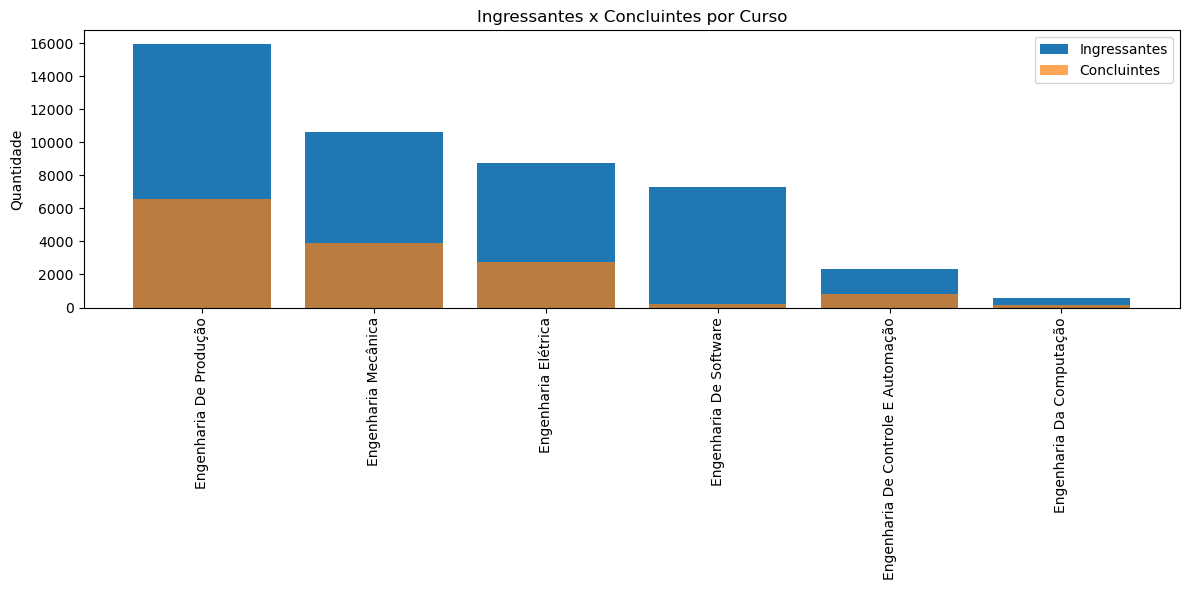

In [13]:
ingressantes_concluintes = (
    df.groupby("NO_CURSO")[["QT_ING", "QT_CONC"]]
      .sum()
      .sort_values("QT_ING", ascending=False)
)

display(ingressantes_concluintes)


# ====== GRÁFICO ======
plt.figure(figsize=(12,6))

plt.bar(ingressantes_concluintes.index, ingressantes_concluintes["QT_ING"], label="Ingressantes")
plt.bar(ingressantes_concluintes.index, ingressantes_concluintes["QT_CONC"], label="Concluintes", alpha=0.7)

plt.xticks(rotation=90)
plt.title("Ingressantes x Concluintes por Curso")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

# Evasão por curso

,QT_ING,QT_CONC,EVASAO
NO_CURSO,,,
Engenharia De Produção,15984,6589,9395
Engenharia De Software,7287,199,7088
Engenharia Mecânica,10635,3916,6719
Engenharia Elétrica,8740,2734,6006
Engenharia De Controle E Automação,2325,818,1507
Engenharia Da Computação,604,131,473


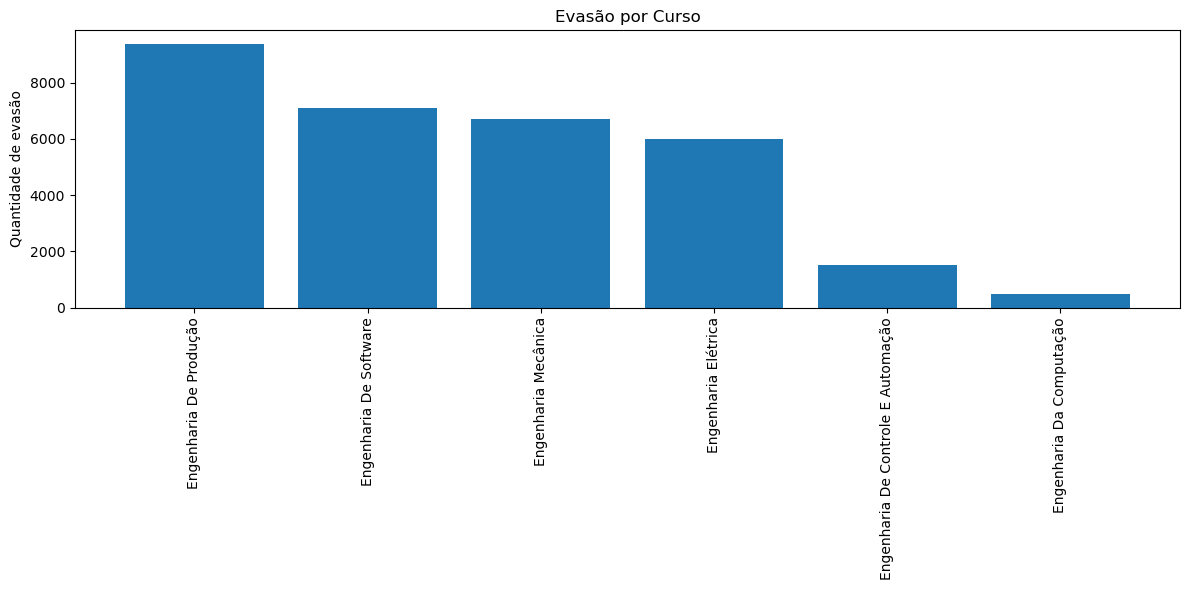

In [14]:
evasao = (
    df.groupby("NO_CURSO")[["QT_ING", "QT_CONC"]]
      .sum()
)

evasao["EVASAO"] = evasao["QT_ING"] - evasao["QT_CONC"]
evasao = evasao.sort_values("EVASAO", ascending=False)

display(evasao)


# ====== GRÁFICO ======
plt.figure(figsize=(12,6))
plt.bar(evasao.index, evasao["EVASAO"])
plt.xticks(rotation=90)
plt.title("Evasão por Curso")
plt.ylabel("Quantidade de evasão")
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar a base
df = pd.read_excel("base_dados.xlsx")

# Somar ingressantes e concluintes por curso
evasao_pct = (
    df.groupby("NO_CURSO")[["QT_ING", "QT_CONC"]]
      .sum()
)

# Calcular evasão em quantidade
evasao_pct["EVASAO_QTD"] = evasao_pct["QT_ING"] - evasao_pct["QT_CONC"]

# Calcular porcentagem de evasão
evasao_pct["EVASAO_%"] = (evasao_pct["EVASAO_QTD"] / evasao_pct["QT_ING"]) * 100

# Remover cursos com 0 ingressantes para evitar divisão por zero
evasao_pct = evasao_pct[evasao_pct["QT_ING"] > 0]

# Ordenar do maior para o menor
evasao_pct = evasao_pct.sort_values("EVASAO_%", ascending=False)
display(evasao_pct)

,QT_ING,QT_CONC,EVASAO_QTD,EVASAO_%
NO_CURSO,,,,
Engenharia De Software,7287,199,7088,97.269109
Engenharia Da Computação,604,131,473,78.311258
Engenharia Elétrica,8740,2734,6006,68.718535
Engenharia De Controle E Automação,2325,818,1507,64.817204
Engenharia Mecânica,10635,3916,6719,63.178185
Engenharia De Produção,15984,6589,9395,58.777528


# EAD vs PRESENCIAL

In [16]:
ead_pres = df.groupby("NO_CURSO")[["QT_INSCRITO_TOTAL", "QT_INSCRITO_TOTAL_EAD"]].sum()

ead_pres["PRESENCIAL"] = ead_pres["QT_INSCRITO_TOTAL"] - ead_pres["QT_INSCRITO_TOTAL_EAD"]
ead_pres = ead_pres.sort_values("QT_INSCRITO_TOTAL", ascending=False)

display(ead_pres)

,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_EAD,PRESENCIAL
NO_CURSO,,,
Engenharia Mecânica,21140,0,21140
Engenharia De Produção,19219,0,19219
Engenharia Elétrica,13047,0,13047
Engenharia De Controle E Automação,6537,0,6537
Engenharia De Software,4734,0,4734
Engenharia Da Computação,2044,0,2044
